<a href="https://colab.research.google.com/github/AayushiBr/AayushiBr/blob/main/Friends_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Friends Series EDA**

---





 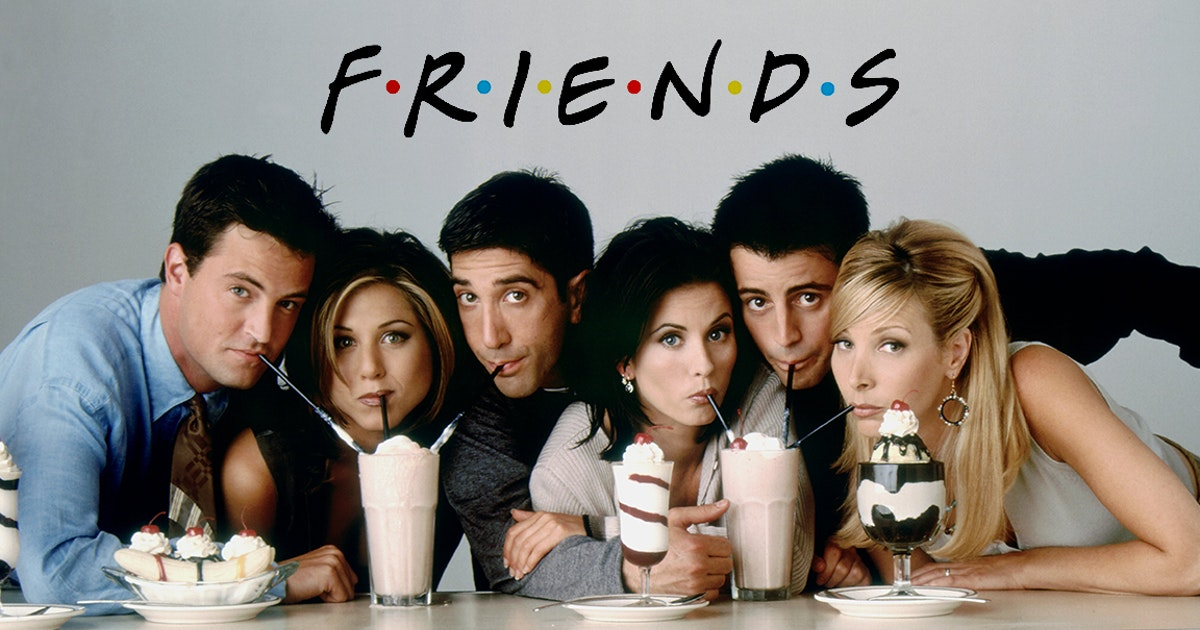

**Import Python librabries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [2]:
friends = pd.read_csv("friends_episodes_v2.csv")


**Checking the dataset from top as well as bottom**

In [3]:
friends.head()


,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [4]:
friends.tail()


,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


**Renaming the duplicate files**

In [5]:
friends.loc[233,'Episode_Title'] = "The Last One I"
friends.loc[234,"Episode_Title"] = "The Last One II"

In [6]:
friends.tail()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One II,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


**Verifying the duplicates if any present**

In [7]:
friends.duplicated().sum()


0

In [8]:
friends.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    int64  
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 14.8+ KB


**Changing the datatype for Season from int to object**

In [9]:
friends['Season'] = friends['Season'].astype("object")


In [10]:
friends.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    object 
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 14.8+ KB


In [11]:
friends.shape


(235, 8)

**1) Show aired in which year?**

In [12]:
print("The show started in {} and ended in {}".format(min(friends['Year_of_prod']),max(friends['Year_of_prod'])))


The show started in 1994 and ended in 2004


**2) Count the total number of seasons and episodes?**

In [13]:
friends['Season'].value_counts().sort_index()


1     23
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: Season, dtype: int64

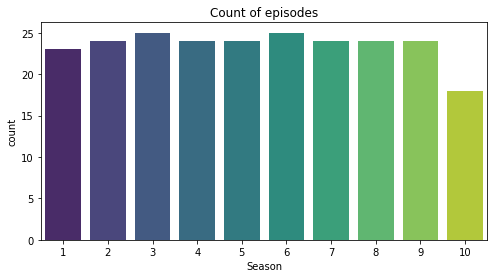

In [39]:
plt.figure(figsize=(8,4))
plt.xlabel("Season")
plt.title("Count of episodes")
sns.countplot(x = "Season", data = friends,palette='viridis')

**3) Duration of each seasons aired?**



In [40]:
season_duration = friends.groupby('Season').Duration.sum().to_frame().reset_index()
season_duration

,Season,Duration
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


(300.0, 600.0)

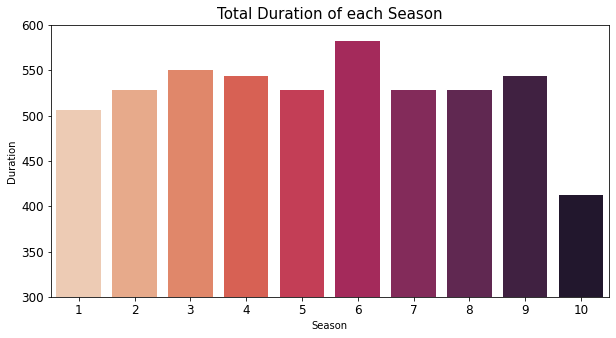

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='rocket_r')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Season')
plt.ylabel('Duration')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(300, 600)

**4) Average IMDB rating for Season and episode aired?**

In [42]:
season_stars = friends.groupby('Season').mean().Stars.to_frame().reset_index()
season_stars.columns = ['Season','Average Stars']
season_stars = season_stars.sort_values('Average Stars', ascending=False)
season_stars

,Season,Average Stars
9,10,8.677778
4,5,8.637500
5,6,8.496000
3,4,8.475000
1,2,8.458333
7,8,8.445833
6,7,8.437500
2,3,8.408000
0,1,8.317391
8,9,8.291667


(8.0, 9.0)

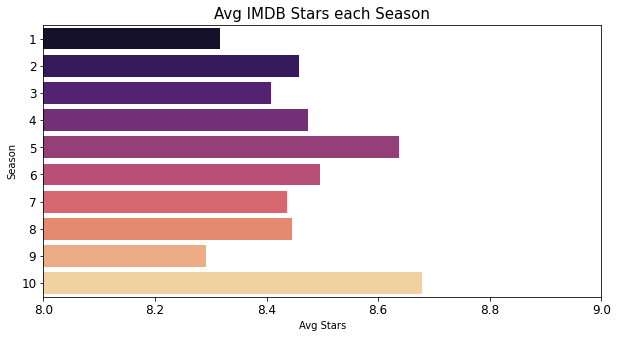

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_stars.Season, x=season_stars['Average Stars'], palette='magma', orient='h')
plt.title('Avg IMDB Stars each Season', fontsize=15)
plt.xlabel('Avg Stars')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(8, 9)

In [44]:
season_pop_epi = friends[['Episode_Title', 'Stars']].sort_values('Stars', ascending=False).head(10).reset_index(drop=True)
season_pop_epi

,Episode_Title,Stars
0,The Last One II,9.7
1,The One Where Everybody Finds Out,9.7
2,The Last One I,9.5
3,The One with the Embryos,9.5
4,The One with the Prom Video,9.4
5,The One with the Rumor,9.3
6,The One with the Proposal,9.3
7,The One with the Videotape,9.3
8,The One with Monica and Chandler's Wedding: Pa...,9.2
9,The One with Ross's Wedding,9.2


**5) List of Top 10 High-rated Episodes of Friends Series?**

(9.0, 10.0)

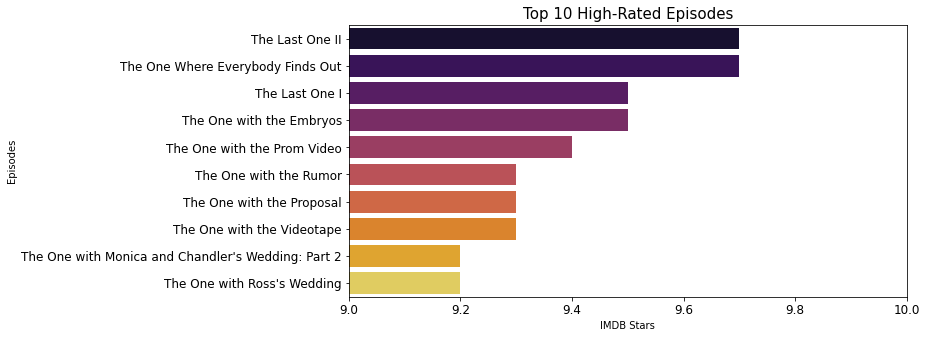

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Episode_Title, x=season_pop_epi.Stars, palette='inferno', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(9, 10)

In [46]:
season_pop_epi = friends[['Episode_Title', 'Stars']].sort_values('Stars', ascending=False).tail(10).reset_index(drop=True)
season_pop_epi

,Episode_Title,Stars
0,The One with the Fake Monica,7.9
1,The One with the Stain,7.9
2,The One with the Evil Orthodontist,7.9
3,The One Where They're Going to Party!,7.9
4,The One with the Donor,7.8
5,The One with Joey's Interview,7.5
6,The One with the Vows,7.5
7,The One with Christmas in Tulsa,7.5
8,The One with Mac and C.H.E.E.S.E.,7.4
9,The One with the Invitation,7.2


(7.0, 8.0)

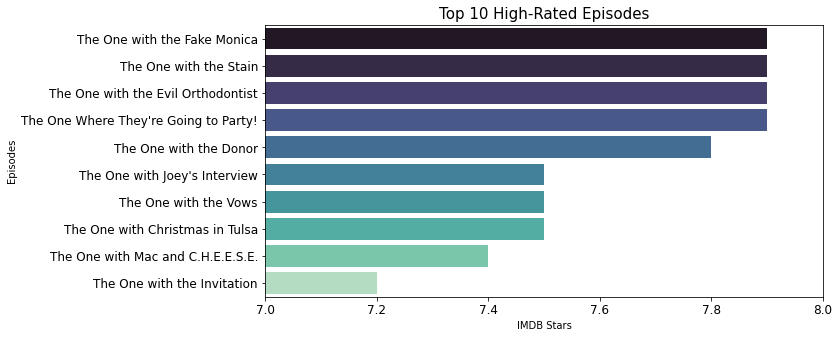

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Episode_Title, x=season_pop_epi.Stars, palette='mako', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(7, 8)

**7)How many episodes each director has made? List of top 10 directors.**

In [48]:
director_count = friends.groupby("Director").Episode_Title.count().sort_values(ascending=False)
director_count


Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
Gail Mancuso            14
James Burrows           14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Shelley Jensen           6
Robby Benson             6
Terry Hughes             5
Dana De Vally Piazza     3
Sheldon Epps             3
Thomas Schlamme          2
Steve Zuckerman          2
Roger Christiansen       2
Alan Myerson             2
Pamela Fryman            2
Paul Lazarus             1
Andrew Tsao              1
Sam Simon                1
Mary Kay Place           1
Joe Regalbuto            1
Stephen Prime            1
Ellen Gittelsohn         1
David Steinberg          1
Arlene Sanford           1
Todd Holland             1
Name: Episode_Title, dtype: int64

In [49]:
director_count.count()


28

In [50]:
top10_dir = director_count.head(10).reset_index()
top10_dir

,Director,Episode_Title
0,Gary Halvorson,54
1,Kevin Bright,54
2,Michael Lembeck,24
3,Gail Mancuso,14
4,James Burrows,14
5,Peter Bonerz,12
6,Ben Weiss,10
7,David Schwimmer,10
8,Shelley Jensen,6
9,Robby Benson,6


Text(0, 0.5, 'No Of Episodes')

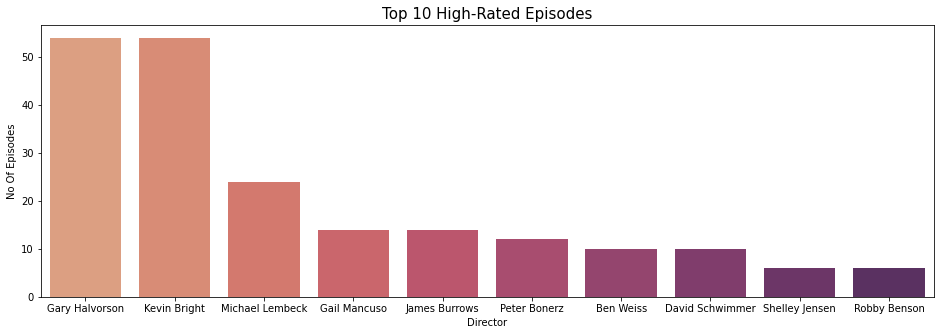

In [54]:
plt.figure(figsize=(16,5))
sns.barplot(x=top10_dir['Director'], y=top10_dir['Episode_Title'], palette='flare')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('Director')
plt.ylabel('No Of Episodes')

In [55]:
director_1 = director_count.reset_index()
director_1.columns= ["Director","Episode Count"]

director_1 = director_1[director_1['Episode Count'] == 1]
director_1

,Director,Episode Count
18,Paul Lazarus,1
19,Andrew Tsao,1
20,Sam Simon,1
21,Mary Kay Place,1
22,Joe Regalbuto,1
23,Stephen Prime,1
24,Ellen Gittelsohn,1
25,David Steinberg,1
26,Arlene Sanford,1
27,Todd Holland,1
